## Franchises

Create a bar chart with hystoric wins and losses for every MLB active franchise. Discriminate non active franchises. The status and Id for every franchise will be in the TeamsFranchise.csv database. Wins and losses are in the Teams.csv database.

Crear una gráfica de barras con histórico de ganados y perdidos de todas las franquicias activas de MLB. Discriminar franquicias inactivas. El estado y Id de cada franquicia está en la base de datos TeamsFranchise.csv. Ganados y perdidos aparecen en la base de datos Teams.csv.

The set of databases can be found in this link. Consider it is a csv file. Find the data bases in the Core folder.

https://github.com/chadwickbureau/baseballdatabank/tree/master/core

TeamsFranchise.csv database

https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/TeamsFranchises.csv

Teams.csv data base

https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
START_YEAR = 2000
END_YEAR = 2022
TEAMS_DB_ADDRESS = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv'
TEAMS_FRANCHISES_DB_ADDRESS = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/TeamsFranchises.csv'

In [3]:
# Reading Data bases. Convert them into Data Frame.
teamsDF = pd.read_csv(TEAMS_DB_ADDRESS)
teamFranchisesDF = pd.read_csv(TEAMS_FRANCHISES_DB_ADDRESS)

In [4]:
# Retrieving only active franchises
activeFranchisesDF = teamFranchisesDF.loc[teamFranchisesDF.active == 'Y', ['franchID', 'franchName']]

In [5]:
yearCondition = (teamsDF.yearID >= START_YEAR) & (teamsDF.yearID <= END_YEAR)

In [6]:
# Populate
activeFranchisesWLDf = pd.DataFrame()
for activeFranchise in activeFranchisesDF.franchID:
    forCurrentTeamCondition = teamsDF.franchID == activeFranchise
    activeFranchiseStatsDf = teamsDF.loc[forCurrentTeamCondition & yearCondition, ['franchID', 'yearID', 'W', 'L']]
    activeFranchiseTotalWins = activeFranchiseStatsDf.W.sum()
    activeFranchiseTotalLossess = activeFranchiseStatsDf.L.sum()
    temporaryDf = pd.DataFrame({'franchID' : activeFranchise, 'W': [activeFranchiseTotalWins], 'L': [activeFranchiseTotalLossess]})
    activeFranchisesWLDf = pd.concat([activeFranchisesWLDf,temporaryDf], ignore_index = True, axis = 0)

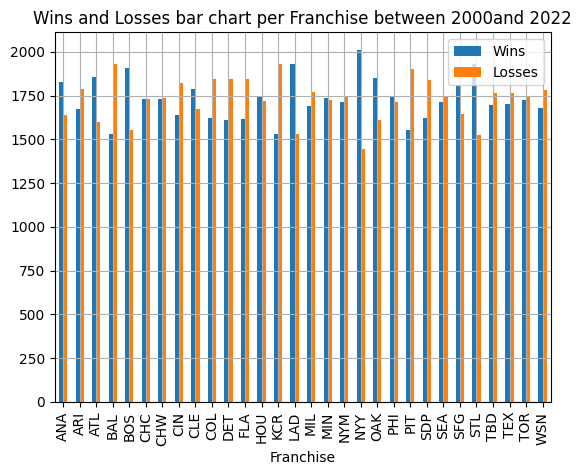

In [7]:
activeFranchisesWLDf.plot(x='franchID', y = ['W', 'L'], kind='bar')
plt.title('Wins and Losses bar chart per Franchise between ' + str(START_YEAR) + 'and ' + str(END_YEAR))
plt.xlabel('Franchise')
plt.legend(['Wins', 'Losses'])
plt.grid()
plt.show()